In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import nltk
# nltk.download('all')

In [1]:
import pandas as pd
import sklearn
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



C:\Users\fatma\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data=pd.read_csv('Data/final_data_en.csv', index_col='id')
data=data[['text','class']]
data

,text,class
id,,
1039,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,@SAD_istfied I'm gonna cry /pos,stress
6069,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...
7813,Im nervous ash to fly though,anxiety
1305,64E7B6DA :Battle ID\nI need backup!\nLvl 120 G...,lonely
5192,SNOW MUCH FUN writing about our snow days in @...,anxiety


In [3]:
import numpy as np
import tensorflow as tf
# train=data.loc[ :33802]
# test=data.loc[33803: ]
data=data.sample(frac=1)


data

,text,class
id,,
187,omg baekhyun didn't see lucas' comment and jus...,stress
8637,it's 9pm and I feel like this day never really...,normal
7392,RT @NolaAngelMedium: manipulative ppl cant sta...,anxiety
2571,RT @RetireMarco: RT if youre tired of Marco Ru...,stress
8384,RT @AllanForsyth: A ceiling fan? Not before I ...,normal
...,...,...
3688,@SenSchumer After all the arguments and counte...,normal
1268,@tiffanyjewel10 @Badgirlsbedhead @The_LeftistM...,anxiety
2212,@EvenMoreSweet I still have some shoes I need ...,lonely


In [4]:
data.dropna(inplace=True)



In [5]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [6]:
data

,text,class
id,,
187,omg baekhyun didn't see lucas' comment and jus...,stress
8637,it's 9pm and I feel like this day never really...,normal
7392,RT @NolaAngelMedium: manipulative ppl cant sta...,anxiety
2571,RT @RetireMarco: RT if youre tired of Marco Ru...,stress
8384,RT @AllanForsyth: A ceiling fan? Not before I ...,normal
...,...,...
3688,@SenSchumer After all the arguments and counte...,normal
1268,@tiffanyjewel10 @Badgirlsbedhead @The_LeftistM...,anxiety
2212,@EvenMoreSweet I still have some shoes I need ...,lonely


In [7]:
cachedStopWords = list(esw)
lemmatizer=WordNetLemmatizer()
#ps = PorterStemmer()

def lemmatize_article(sentence):
    sentence = word_tokenize(sentence)
    res = ''
    for word, tag in pos_tag(sentence):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        word = lemmatizer.lemmatize(word, wntag) if wntag else word
        res += word + ' '
    return res


def remove_stop_words(sentence):
    return ' '.join([word for word in sentence.split() if word not in cachedStopWords])
    
def remove_short(sentence):
    return ' '.join([word for word in sentence.split() if len(word) >= 3])
    
def remove_digits(sentence):
    return ' '.join([i for i in sentence.split() if not i.isdigit()])
    
def preprocess(all_texts):
    all_texts = list(map(lambda x: x.lower(), all_texts))
    all_texts = list(map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), all_texts))
    all_texts = list(map(lambda x: lemmatize_article(x), all_texts))
    all_texts = list(map(lambda x: x.strip(), all_texts))
    all_texts = list(map(lambda x: remove_stop_words(x), all_texts))
    all_texts = list(map(lambda x: remove_short(x), all_texts))
    all_texts = list(map(lambda x: remove_digits(x), all_texts))
    return all_texts

In [8]:
data['text'] = data['text'].str.replace(r'\s*@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*\B@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+\b', '', regex = True)
data['text'] = data['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
data


,text,class
id,,
187,omg baekhyun didn't see lucas' comment and jus...,stress
8637,it's 9pm and I feel like this day never really...,normal
7392,RT: manipulative ppl cant stand is a intuitive...,anxiety
2571,RT: RT if youre tired of Marco Rubio tweeting ...,stress
8384,RT: A ceiling fan? Not before I visited the Si...,normal
...,...,...
3688,After all the arguments and counter arguments...,normal
1268,Need help with $255 utilities bill. Laid off ...,anxiety
2212,I still have some shoes I need for my collect...,lonely


In [9]:
data['text'] = preprocess(data['text'])
data

,text,class
id,,
187,omg baekhyun didnt lucas comment just end live...,stress
8637,9pm feel like day really exist saw today just ...,normal
7392,manipulative ppl stand intuitive person shit g...,anxiety
2571,youre tire marco rubio tweet bible verse doesn...,stress
8384,ceiling fan visit sistine chapel wasnt,normal
...,...,...
3688,argument counter argument complete hold final ...,normal
1268,need help utility lay month ago mom die june p...,anxiety
2212,shoe need collection lol,lonely


In [10]:
data = pd.DataFrame(data)
data.head()

,text,class
id,,
187,omg baekhyun didnt lucas comment just end live...,stress
8637,9pm feel like day really exist saw today just ...,normal
7392,manipulative ppl stand intuitive person shit g...,anxiety
2571,youre tire marco rubio tweet bible verse doesn...,stress
8384,ceiling fan visit sistine chapel wasnt,normal


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

In [12]:
data = data[(data["text"] != "") & (data["text"] != "null")]


In [13]:
data.shape

(39555, 2)

In [14]:
data['class'].shape

(39555,)

In [15]:
X = data['text'].values
Y = data['class'].values


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state = 0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

MultinomialNB()


 Accuracy:  0.6411898542175781

Classification Report

               precision    recall  f1-score   support

     anxiety       0.59      0.69      0.64      3809
      lonely       0.57      0.50      0.53      2505
      normal       0.60      0.57      0.58      2977
      stress       0.83      0.79      0.81      2576

    accuracy                           0.64     11867
   macro avg       0.65      0.64      0.64     11867
weighted avg       0.64      0.64      0.64     11867



### Hyperparameters tuning for NB

Fitting 15 folds for each of 8 candidates, totalling 120 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             scoring='accuracy', verbose=1)

{'alpha': 1}

0.6376287374043825

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Mean CV Score')

Text(0.5, 1.0, 'NB Performance Comparison')

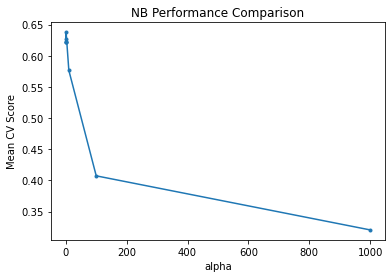

accuracy_score on test dataset :  0.6411898542175781

 Accuracy:  0.6411898542175781

Classification Report

               precision    recall  f1-score   support

     anxiety       0.59      0.69      0.64      3809
      lonely       0.57      0.50      0.53      2505
      normal       0.60      0.57      0.58      2977
      stress       0.83      0.79      0.81      2576

    accuracy                           0.64     11867
   macro avg       0.65      0.64      0.64     11867
weighted avg       0.64      0.64      0.64     11867



In [19]:
model = MultinomialNB()
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_train, y_train)
gs_NB.best_params_
gs_NB.best_score_

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


plt.plot(results_NB['alpha'], results_NB['test_score'], marker = '.')    
plt.xlabel('alpha')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

# predict the target on the test dataset
predict_test = gs_NB.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


classification_report = classification_report(y_test, predict_test)

print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

In [32]:
# predict_test

array(['normal', 'lonely', 'lonely', ..., 'normal', 'stress', 'anxiety'],
      dtype='<U7')

In [33]:
# y_test

array(['lonely', 'lonely', 'anxiety', ..., 'normal', 'stress', 'anxiety'],
      dtype=object)

In [35]:
import re
classifiers = [
    LogisticRegression(solver="sag", random_state=42),
    LinearSVC(random_state=42),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=42),
    MLPClassifier(
        random_state=42,
        solver="adam",
        hidden_layer_sizes=(500, 500, 400),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [36]:
%%time
import pickle
import sklearn

# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    report = sklearn.metrics.classification_report(y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
Training classifier: XGBClassifier


C:\Users\fatma\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training classifier: MLPClassifier
Wall time: 16min 16s


for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

### hyperparameters for logistic regression

In [20]:
%%time
# feature creation and modelling in a single function using pipeline
pipe = Pipeline([("lr", LogisticRegression())])

# define parameter space to test
params = {
    # parameters for the classifier
    # lr__solver points to lr->solver for the classifier
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
     # lr__penalty points to lr->penalty of the regularization to prevent the overfitting in the model  
    'lr__penalty': ['l2'],
      # lr__C points to lr->C values 
    'lr__C' : [1000, 100, 10, 1.0, 0.1, 0.01]
}
# n_jobs = -1 to work on all virtual processors
# cv = 3 means 3 k folds and 3 times for cross validation by changing each time the validation part
pipe_lr_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc",verbose=1, cv = 3)
# make fitting for the model to try all combinations created for the hyperparameters
pipe_lr_clf.fit(X_train, y_train)
# pickle.dump(pipe_lr_clf, open("./pipe_lr_clf.pck", "wb"))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


Wall time: 35min 22s


GridSearchCV(cv=3, estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'lr__penalty': ['l2'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=1)

In [21]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_lr_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_lr_clf.best_score_))

{'lr__C': 1000, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}
best score nan


In [22]:
# run the pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, y_train)

Pipeline(steps=[('lr', LogisticRegression(C=1000, solver='newton-cg'))])

In [25]:
prediction = pipe.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', report)



 Accuracy:  0.6411898542175781

Classification Report

               precision    recall  f1-score   support

     anxiety       0.70      0.63      0.66      3809
      lonely       0.55      0.66      0.60      2505
      normal       0.78      0.74      0.76      2977
      stress       0.89      0.89      0.89      2576

    accuracy                           0.72     11867
   macro avg       0.73      0.73      0.73     11867
weighted avg       0.73      0.72      0.72     11867



### hyperparameters for LinearSVC

### hyperparameters for RandomForestClassifier

### hyperparameters for XGBClassifier

In [29]:
%%time

from skopt import BayesSearchCV

# feature creation with word based analyzer and modelling in a single function using pipeline
pipe_xgb = Pipeline([("xgb", XGBClassifier())])

# define parameter space to test
params_xgb = {
    # parameters for the classifier
    # xgb__n_estimators points to xgb->number of estimators
    'xgb__n_estimators': [80, 100, 200, 300, 400],  
     # xgb__max_depth points to xgb->max_depth
    'xgb__max_depth':[50, 100, 200, 300]  
}

# use bayes search to find the best combination of the hyperparameters with cross-validation = 2 which means 2 k folds and 2 
# times to change the validation set each time
pipe_xgb_clf = BayesSearchCV(pipe_xgb, params_xgb, n_jobs=-1, cv=2, scoring="roc_auc", verbose = 1,
     # number of trials 
        n_iter=60)
# make fitting with each combination made to find the best one that gives the best results
pipe_xgb_clf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


KeyboardInterrupt: 

In [30]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_xgb_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_xgb_clf.best_score_))

AttributeError: 'BayesSearchCV' object has no attribute 'best_params_'

In [ ]:
# run pipe with optimized parameters
pipe_xgb.set_params(**best_params).fit(X_train, y_train)

prediction = pipe_xgb.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', report)
